In [1]:
import numpy as np
import pandas as pd

# Load dataset
dataset = pd.read_csv("/content/drive/MyDrive/Dataset/phishing.csv")
print("Dataset Loaded:")
print(dataset.head(5))


Dataset Loaded:
   Index  UsingIP  LongURL  ShortURL  Symbol@  Redirecting//  PrefixSuffix-  \
0      0        1        1         1        1              1             -1   
1      1        1        0         1        1              1             -1   
2      2        1        0         1        1              1             -1   
3      3        1        0        -1        1              1             -1   
4      4       -1        0        -1        1             -1             -1   

   SubDomains  HTTPS  DomainRegLen  ...  UsingPopupWindow  IframeRedirection  \
0           0      1            -1  ...                 1                  1   
1          -1     -1            -1  ...                 1                  1   
2          -1     -1             1  ...                 1                  1   
3           1      1            -1  ...                -1                  1   
4           1      1            -1  ...                 1                  1   

   AgeofDomain  DNSRecording

In [2]:
# Misalnya, kolom terakhir adalah target 'y', dan sisanya adalah fitur 'X'
X = dataset.iloc[:, :-1].values  # Semua kolom kecuali target
y = dataset.iloc[:, -1].values   # Kolom target

print("Unique Target Values:", np.unique(y))


Unique Target Values: [-1  1]


In [9]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standarisasi data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Terapkan PCA dengan mempertahankan 95% variansi
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_standardized)

# Menampilkan jumlah komponen yang dipilih
print(f"Jumlah komponen utama setelah PCA: {X_pca.shape[1]}")

# Menampilkan data setelah PCA (5 baris pertama)
print("\nData setelah PCA (5 baris pertama):")
print(X_pca[:1])


Jumlah komponen utama setelah PCA: 24

Data setelah PCA (5 baris pertama):
[[ 0.74661388 -1.04596818  0.18150768 -2.14985057  1.2034117  -0.05416899
   0.68916548  1.33248269 -0.25193047 -1.26070781 -0.1052182  -0.07003325
  -0.90338101  0.88220245  0.18870836 -0.21884291 -0.71482525 -1.20031889
  -0.99066379  0.0707539   0.82612498  0.38265676  1.4586047   0.26231067]]


In [ ]:
from sklearn.model_selection import train_test_split

# Membagi data hasil PCA menjadi data pelatihan (70%) dan data pengujian (30%)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Menampilkan dimensi data pelatihan dan pengujian
print(f"Dimensi data pelatihan: {X_train_pca.shape}")
print(f"Dimensi data pengujian: {X_test_pca.shape}")



Dimensi data pelatihan: (8843, 24)
Dimensi data pengujian: (2211, 24)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

gbc.fit(X_train_pca,y_train)

GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

Akurasi Model Gradient Boosting: 0.939394

Classification Report:
              precision    recall  f1-score   support

          -1       0.94      0.92      0.93       976
           1       0.94      0.96      0.95      1235

    accuracy                           0.94      2211
   macro avg       0.94      0.94      0.94      2211
weighted avg       0.94      0.94      0.94      2211



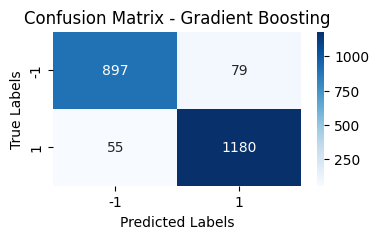

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Definisikan model Gradient Boosting Classifier
gbc = GradientBoostingClassifier()

# Pastikan data training sudah tersedia
# Latih model dengan data training
gbc.fit(X_train_pca, y_train)

# Prediksi pada data uji
y_pred = gbc.predict(X_test_pca)

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menghitung Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model Gradient Boosting: {accuracy:.6f}")

# Menampilkan Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Membuat heatmap untuk Confusion Matrix
plt.figure(figsize=(4, 2))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=gbc.classes_, yticklabels=gbc.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()
